# Part 1

In [8]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [9]:
R_1 = 20000
R_2 = 10000
C = 20e-12

In [99]:
def diode (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    if (x > 1000000):
        return 1000000
    return I_s * (np.exp (x / v_t) - 1)

def diode_dot (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s / v_t * (np.exp (x / v_t))

<IPython.core.display.Javascript object>


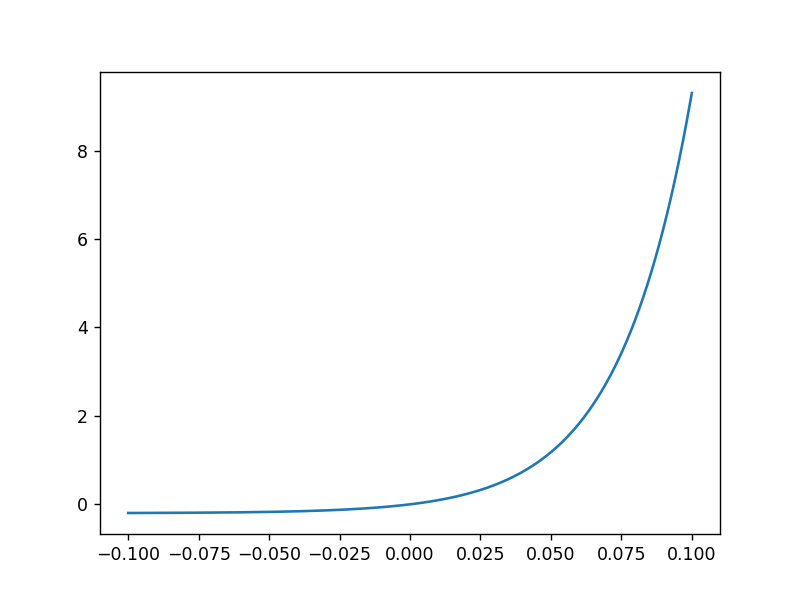

In [102]:
n = np.linspace (-.1, .1, 1000)
diode_out = np.zeros(1000)
for i in range(1000):
    diode_out[i] = diode (i)

plt.figure()
plt.plot (n, diode (n))

In [11]:
def deriv (x, x_1, x_1_dot, T):
    return (x - x_1) * (2/T) - x_1_dot

def integral (x_1, x_dot, x_1_dot, T):
    return x_1 + (T/2) * (x_dot + x_1_dot)

<IPython.core.display.Javascript object>


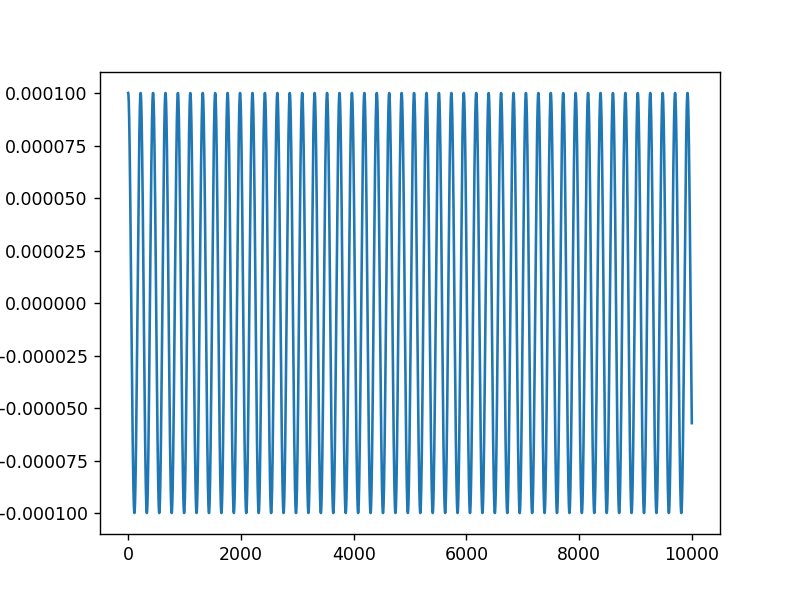

In [110]:
fs = 44100
N = 10000
freq = 200
n = np.arange (N)
x = np.zeros (N)
x[:N] = np.cos (2 * np.pi * n[:N] * freq / fs) / 10000
plt.figure()
plt.plot (x)

C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


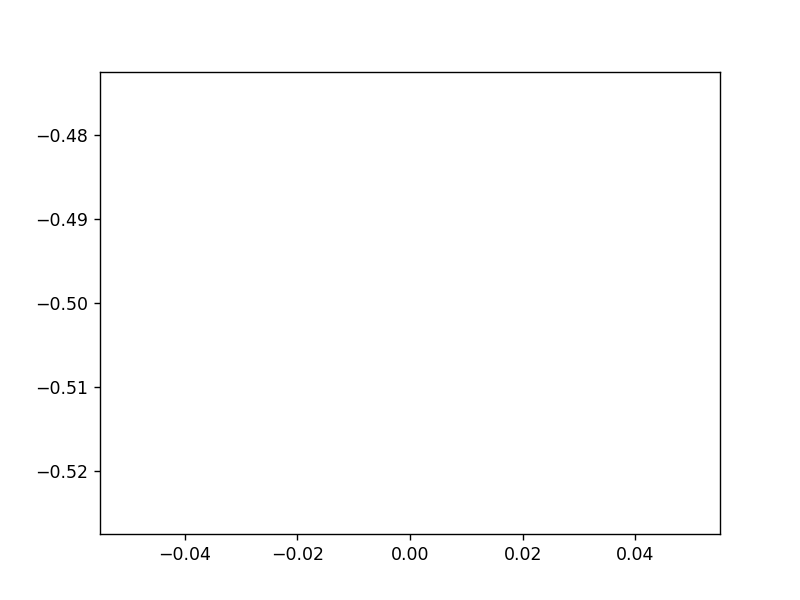

<IPython.core.display.Javascript object>


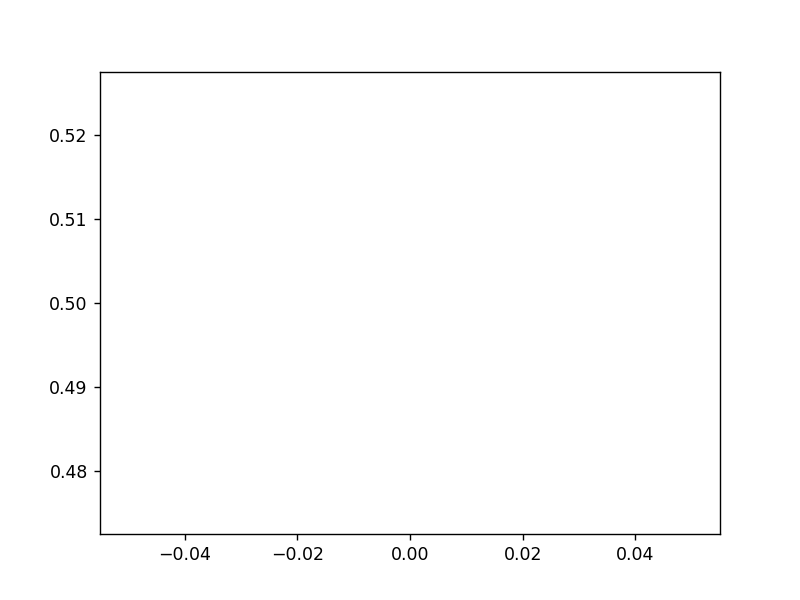

In [109]:
v_i = 0
v_i_dot = 0

v_b = 0
v_b_dot = 0

v_c = 0
v_c_dot = 0

y = np.zeros (N)
test = np.zeros (N)

for n in range (N):
#     print (v_b)
#     if (v_c - v_b > 100000000):
#         print (n)
#         break
        
    v_b_dot_1 = v_b_dot    
    v_b_dot = ((v_c * (1/R_1 + 1/R_2) - diode (v_c - v_b)) / C) + v_c_dot
    v_b_1 = v_b
    v_b = integral (v_b_1, v_b_dot, v_b_dot_1, 1.0/fs)
    
    v_i_1 = v_i
    v_i = x[n]
    v_i_dot_1 = v_i_dot
    v_i_dot = deriv (v_i, v_i_1, v_i_dot_1, 1.0/fs)
    
    v_c_1 = v_c
    v_c = R_2 * (diode (v_b) - v_i/R_1)
    v_c_dot_1 = v_c_dot
    v_c_dot = deriv (v_c, v_c_1, v_c_dot_1, 1.0/fs)
    
#     v_c_dot_1 = v_c_dot
#     v_c_dot = R_2 * (v_b_dot * diode_dot (-v_b) - v_i_dot/R_1)
#     v_c_1 = v_c
#     v_c = integral (v_c_1, v_c_dot, v_c_dot_1, 1.0/fs)
    
    y[n] = v_c # v_c
    test[n] = (v_b - v_c)
    
plt.figure()
plt.plot (y)

plt.figure()
plt.plot (test)
# plt.xlim ((0, 2))

# Part 2

In [7]:
R_3 = 20000

<IPython.core.display.Javascript object>


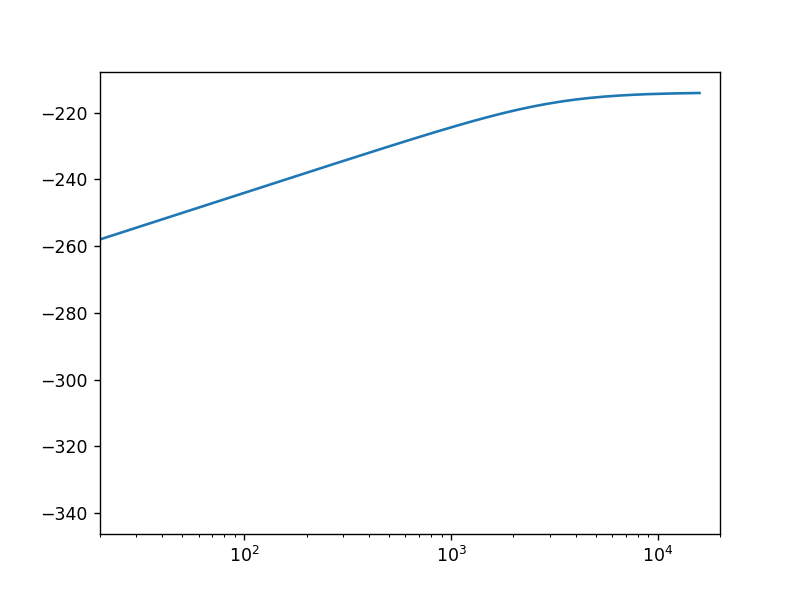

(20, 20000)

In [8]:
# input filter
b1_i = -R_3 * C
b0_i = 0

a1_i = R_3
a0_i = R_3 * R_3

w, H_i = signal.freqs ([b1_i, b0_i], [a1_i, a0_i])
plt.figure()
plt.semilogx (w / (2 * np.pi), 20 * np.log10 (np.abs (H_i)))
plt.xlim ((20, 20000))

<IPython.core.display.Javascript object>


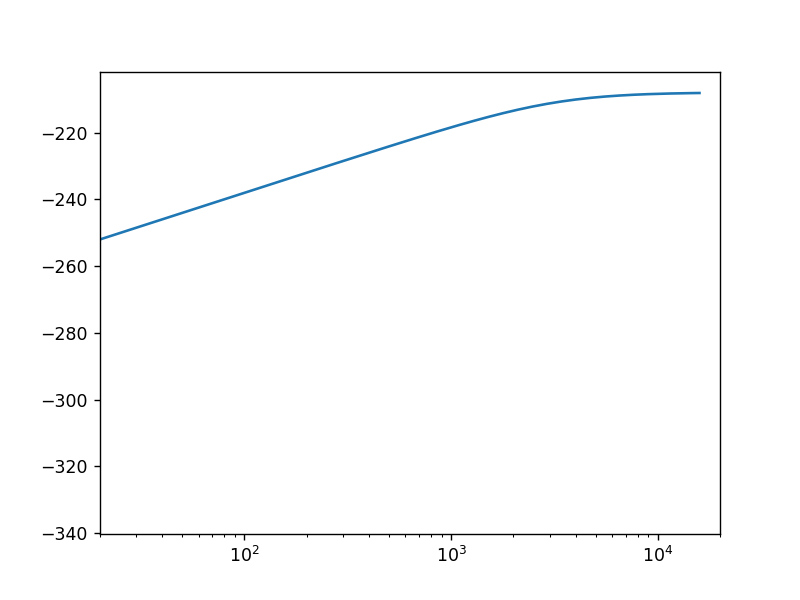

(20, 20000)

In [11]:
# control filter
b1_c = -R_3 * C
b0_c = 0

a1_c = R_2
a0_c = R_2 * R_3

w, H_c = signal.freqs ([b1_c, b0_c], [a1_c, a0_c])
plt.figure()
plt.semilogx (w / (2 * np.pi), 20 * np.log10 (np.abs (H_c)))
plt.xlim ((20, 20000))

<IPython.core.display.Javascript object>


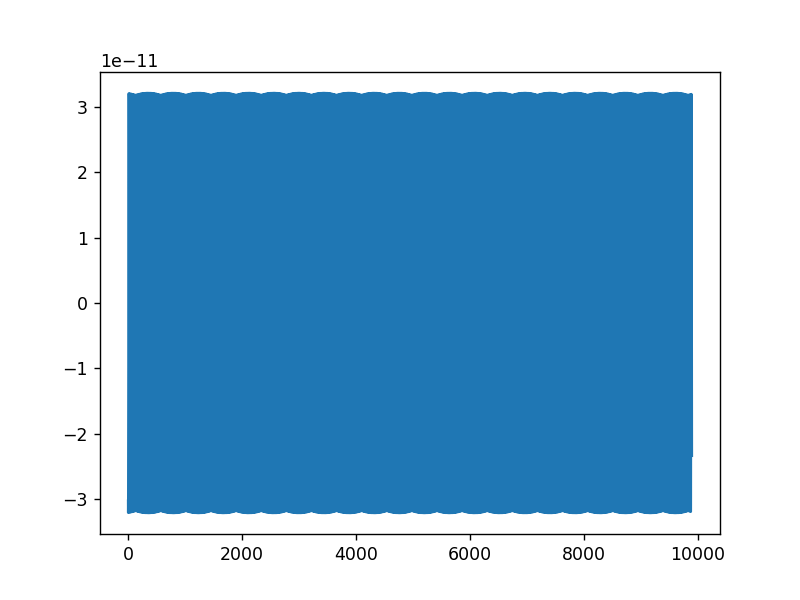

In [16]:
b_z_i, a_z_i = signal.bilinear ([b1_i, b0_i], [a1_i, a0_i], fs=fs)
b_z_c, a_z_c = signal.bilinear ([b1_c, b0_c], [a1_c, a0_c], fs=fs)

z_i = 0.0
z_c = 0.0

y2 = np.zeros(N)

for n in range (N):
    y_i = z_i + y[n] * b_z_i[0]
    z_i = y[n] * b_z_i[1] - y_i * a_z_i[1]
    
    y_c = z_c + y[n] * b_z_c[0]
    z_c = y[n] * b_z_c[1] - y_c * a_z_c[1]
    
    y2[n] = y_i + y_c
    
plt.figure()
plt.plot (y2[100:])